## 7.2 Hypothesis Concept, Errors, p-Value, and Sample Size

#### 1. An Example

Assume that you are running a private educational institution. Your contract says
that if your students score 110 in the final exam, where the national average is 100,
you get a bonus. When the results are significantly lower, you loose your bonus
(because the students are not good enough), and you have to hire more teachers; and
when the results are significantly higher, you also loose your bonus (because you
have spent too much money on teachers), and you have to cut back on the number
of teachers.

The final exam of your ten students produce the following scores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

%matplotlib inline
plt.style.use('seaborn-white')
warnings.filterwarnings('ignore')

In [2]:
scores=np.array([109.4, 76.2, 128.7, 93.7, 85.6,
117.7, 117.2, 87.3, 100.3, 55.1])
scores

array([109.4,  76.2, 128.7,  93.7,  85.6, 117.7, 117.2,  87.3, 100.3,
        55.1])

##### Fig 7.4 
The question we ask: based on our sample mean (dashed-dotted line) and the observed
variance of the data (the sample variance), do we believe that the population mean is different
from 110 (dashed line)? Or in other words: our null hypothesis is that the difference between the
population mean and 110 is zero. Can we keep our null hypothesis, or do we have to reject it based
on the data?

The question we want to answer: Is the mean value of the scores (97.1)
significantly different from 110?

$$H_o: \theta=110~~vs~~H_1: \theta\neq 110$$

Text(0, 0.5, 'Score')

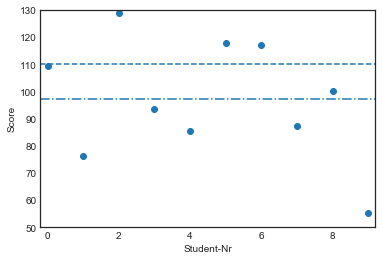

In [3]:
plt.plot(scores,'o')
plt.axhline(110,ls='--')
plt.axhline(np.mean(scores), ls='-.')

plt.xlim(-0.2,9.2)
plt.ylim(50,130)
plt.xlabel('Student-Nr')
plt.ylabel('Score')

In [4]:
stats.normaltest(scores)

NormaltestResult(statistic=0.47671379397957303, pvalue=0.7879214341188467)

A normality test indicates that the data are
probably taken from a normal distribution. Since we don’t know the population
variance of the results of students tested, we have to take our best guess, the sample
variance. And we know that the normalized difference between
sample and the population mean, the t-statistic, follows the t-distribution $t_{n-1}$

In [5]:
np.mean(scores)-110

-12.88000000000001

The difference between our sample mean and the value we want to compare it
to is –12.9. Normalized by the sample standard error
, this gives a value of t statistic $$ T=\dfrac{\sqrt{n}(\bar{X}-\theta_0)}{S}$$

In [6]:
tval=np.abs((np.mean(scores)-110)/stats.sem(scores))
print(tval)

1.836024999781543


In [7]:
td=stats.t(len(scores)-1)
td

In [8]:
p=2*td.sf(tval)
print(p)

0.09953843652790623


Given significance level $\alpha=0.05$, we fail to reject $H_o$ because $\alpha<p$.

#### 2. Generalization and Applications

##### Generalization

Based on the previous example, the general procedure for hypothesis tests can be
described as follows

###### Step 1: 
A random sample is drawn from a population. (In our example, the random
sample is our scores).
###### Step 2:
A null hypothesis is formulated. (“There is null difference between the population
mean and the value of 110.” $H_o: \theta=\theta_0$)
###### Step 3:
A test-statistic is calculated, of which we know the probability distribution. (Here
the sample mean, since we know that the mean value of samples from a normal
distribution follows the t-distribution.)
###### Step 4:
Comparing the observed value of the statistic (here the obtained t-value) with the
corresponding distribution (the t-distribution), we can find the likelihood that a
value as extreme as or more extreme than the observed one is found by chance.
This is the so-called p-value.
###### Step 5:
If the p-value is $p < \alpha=0.05$, we reject the null hypothesis, and speak of a
statistically significant difference. If a value of $p < 0.001$ is obtained, the result is typically called highly significant. The critical region of a hypothesis test is the
set of all outcomes which cause the null hypothesis to be rejected.

In other words, the p-value states how likely it is to obtain a value as extreme or
more extreme by chance alone, if the null hypothesis is true.

The value against which the p-value is compared is the significance level, and is
often indicated with the letter $\alpha$. The significance level is a user choice, and typically
set to 0.05.

This way of proceeding to test a hypothesis is called statistical inference.Remember, p only indicates the likelihood of obtaining a certain value for the
test statistic if the null hypothesis is true—nothing else!

And keep in mind that improbable events do happen, even if not very frequently.
For example, back in 1980 a woman named Maureen Wilcox bought tickets for
both the Rhode Island lottery and the Massachusetts lottery. And she got the correct
numbers for both lotteries. Unfortunately for her, she picked all the correct numbers
for Massachusetts on her Rhode Island ticket, and all the right numbers for Rhode
island on her Massachusetts ticket. Seen statistically, the p-value for such an event
would be extremely small—but it did happen anyway.

##### Additional Examples

###### Example 1: 
Let us compare the weight of two groups of subjects. The null hypothesis
is that there is null difference in the weight between the two groups. 
$$H_o: \theta_1=\theta_2 ~~vs~~ H_1: \theta_0\neq \theta_2$$
If a statistical
comparison of the weight produces a p-value of $0.03$ ($p<\alpha$), this means that the probability
that the null hypothesis is correct is $0.03$, or $3\%$. Since this probability is less than
$0.05$, we say that “there is a significant difference between the weight of the two
groups.”

###### Example 2:
(Test for Normality) If we check if a data sample is normally distributed,
the null hypothesis is that “there is no difference between my data and normally
distributed data”: here a large p-value indicates that the data are in fact normally
distributed!

In [9]:
from statsmodels.stats import power

In [10]:
nobs=power.tt_ind_solve_power(effect_size=0.5, alpha=0.05, power=0.8)
print(nobs)

63.765611775409525


##### Example 6.1 (吴喜之1 P105) 

一种味精的包装上写的重量是50g。在随机挑选了30袋味精进行称重后， 得到了30个观测值， 该样本的均值为48.94. 人们因此怀疑重量不足， 想检验厂家所声称的平均50g一包是否属实，也就是根据这个样本来检验总体均值等于50g还是小于50g。
$X_1, \dots, X_{30} \sim N(\theta,\sigma^2)$. 假设为
$$ H_0: \theta =50~~vs~~H_1:\theta<50$$

Create T statistic $T=\dfrac{\sqrt{n}(\bar{X}-\theta_0)}{S},~n=30, \theta_0=50$ 

In [11]:
mg=np.loadtxt('./Data/mg.txt')

In [12]:
mg

array([51.5, 48. , 47. , 46.3, 46.7, 47.8, 51.6, 49.4, 48.2, 52.3, 48.5,
       45.7, 52.1, 51. , 48.7, 46.6, 50.1, 48.5, 50.9, 46.8, 51.6, 49.2,
       46.9, 52.5, 46.2, 45.8, 51. , 48.1, 49.9, 49.3])

In [13]:
tval=np.abs((np.mean(mg)-50)/stats.sem(mg))
print(tval)

2.72780980282215


In [14]:
td=stats.t(len(mg)-1)

In [15]:
p=td.sf(tval)

In [16]:
print(p)

0.0053559643950230815


Given $\alpha=0.05>p$, we reject the null hypothesis.

In [17]:
t, pVal=stats.ttest_1samp(mg,50)

In [18]:
print(pVal/2)

0.005355964395023086


In [19]:
print(t)

-2.7278098028221494


###### Example 8.1

In [20]:
np.random.seed(12345)
data=stats.norm(7,3).rvs(100)

In [21]:
meanVal=np.mean(data)
stdVal=np.std(data,ddof=1)
print('Mean:{0:5.3f};Sample Mean:{1:5.3f}'.format(7, meanVal))
print('SD:{0:5.3f};Sample SD:{1:5.3f}'.format(3,stdVal))

Mean:7.000;Sample Mean:7.101
SD:3.000;Sample SD:3.121


tVal for 6.5: -1.925
t-statistic=1.925, p=0.0571


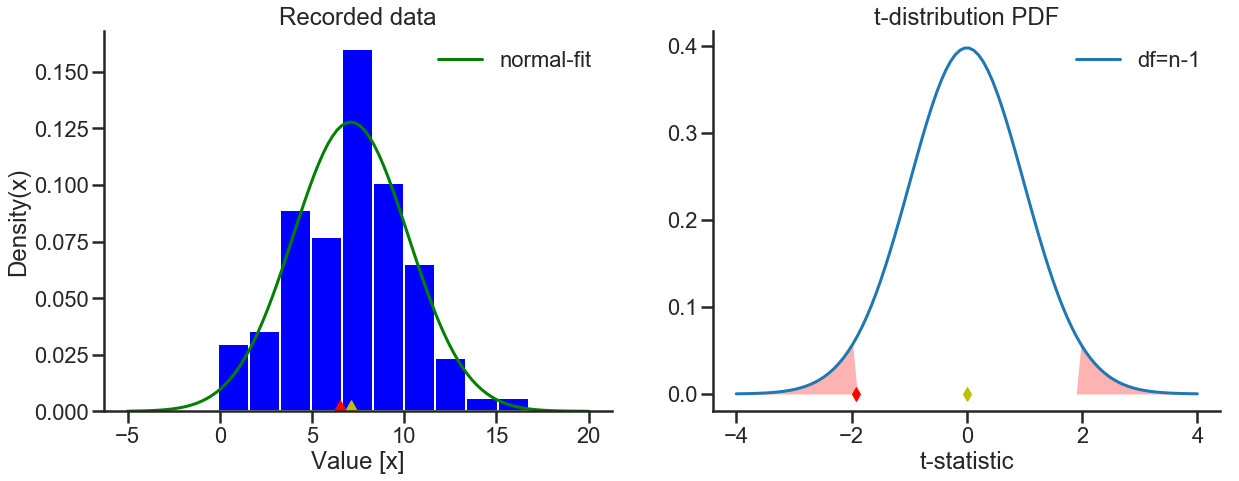

In [65]:
sns.set_context('poster')
sns.set_style('ticks')
fig, (ax1,ax2)=plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(20)

xval=np.linspace(-5,20,100)
yval=stats.norm(meanVal, stdVal).pdf(xval)

ax1.hist(data, normed=True, color='blue')
ax1.plot(xval, yval, 'g', label='normal-fit')
ax1.set_title('Recorded data')
ax1.legend()

checkVal=6.5
ax1.plot(checkVal,0, marker='d', color='r', ms=15)
ax1.plot(meanVal, 0, marker='d', color='y', ms=15)
ax1.set_xlabel('Value [x]')
ax1.set_ylabel('Density(x)')

sns.despine()

## Right plot
xv2 = np.linspace(-4,4, 100)
yv2 = stats.t(len(data)-1).pdf(xv2)

tVal=(checkVal-meanVal)/stats.sem(data)
print('tVal for {0}: {1:5.3f}'.format(checkVal, tVal))

(tstatistic, pVal) = stats.ttest_1samp(data, checkVal)
print('t-statistic={0:5.3f}, p={1:6.4f}'.format(float(tstatistic), pVal))

tFill = yv2.copy()
tFill[(xv2>-tstatistic) & (xv2<tstatistic)] = 0

ax2.plot(xv2, yv2, label='df=n-1')
ax2.fill_between(xv2, tFill, color='r', alpha=0.3, lw=0)
ax2.plot(tVal, 0, 'rd', ms=10)
ax2.plot(0, 0, 'yd', ms=10)
ax2.set_xlabel('t-statistic')
ax2.set_title('t-distribution PDF')
ax2.legend()

sns.despine()

In [23]:
stats.t.ppf(0.1,9)

-1.3830287383964925

In [24]:
stats.t.ppf(1-0.05/2,19)

2.093024054408263

In [25]:
stats.mstats.winsorize(np.array([3,6,7,2,1]), limits=0.2)

masked_array(data=[3, 6, 6, 2, 2],
             mask=False,
       fill_value=999999)

##### Example 6.2 (吴喜之1 P110) 

一种摩托车的排气烟度限值按照厂家声明应该不大于10%. 在抽查了20台摩托车之后, 得到下面的排放数据:(exhaust.txt) 该样本均值为12.127. 究竟能否由此认为该指标的总体均值超过10%? 

假设检验问题为
$$ H_0: \mu=10 ~~~vs~~~H_1:\mu>10$$

In [26]:
exhaust=np.loadtxt('./Data/exhaust.txt')
exhaust

array([11.08, 16.85, 16.68,  7.62, 16.34, 14.83,  9.88, 18.73,  1.68,
       10.16, 12.11,  6.67, 14.36,  9.66, 16.77,  7.84,  7.91, 15.44,
       13.69, 14.24])

In [27]:
tval=(np.mean(exhaust)-10)/stats.sem(exhaust)
print(tval)

2.1625384892970128


In [30]:
t_alpha=stats.t.ppf(1-0.05,20)
print(t_alpha)

1.7247182429207857


In [33]:
t, pVal=stats.ttest_1samp(exhaust,10)
print(t)
print(pVal/2)

2.1625384892970128
0.021769271882945612


$T> t_{n-1}(\alpha)$,hence reject hypothesis $H_0$. $p-value <\alpha=0.05$, Hence reject Hypothesis.

T stats for 10:  2.163
p-value: 0.0435


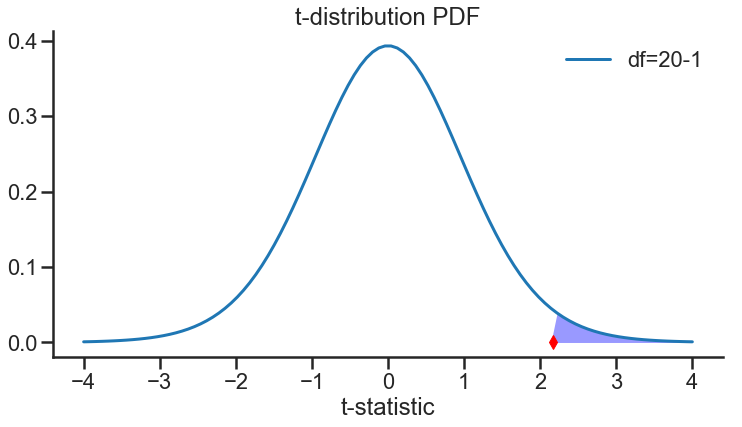

In [64]:
fig, ax=plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(12)

xv=np.linspace(-4,4,100)
yv=stats.t(len(exhaust)-1).pdf(xv)

CheckVal=10
tval=(np.mean(exhaust)-CheckVal)/stats.sem(exhaust)
print("T stats for {0}: {1: 5.3f}".format(CheckVal, tval))

tstats, pval=stats.ttest_1samp(exhaust, CheckVal)
print("p-value: {0:6.4f}".format(pval))

tFill=yv.copy()
tFill[xv<tstats]=0

ax.plot(xv,yv, label="df=20-1")
ax.fill_between(xv, tFill, color='blue', alpha=0.4, lw=0)
ax.plot(tval, 0, 'rd', ms=10)
ax.set_xlabel('t-statistic')
ax.set_title('t-distribution PDF')
ax.legend()

sns.despine()

##### Example 6.3 (吴喜之1 112) 

一种管状零件的标准口径应该是5.8 mm, 测量了一个工人加工的10个零件口径(tube.txt). 这是要看这些零件是否合格. 假设检验问题为
$$ H_0: \mu=5.8 ~~~vs~~~H_1\neq 5.8$$

In [34]:
tube=np.loadtxt('./Data/tube.txt')
tube

array([5.92, 6.2 , 6.32, 5.74, 6.31, 5.58, 5.25, 5.79, 6.03, 5.99])

In [35]:
Tval=np.abs((np.mean(tube)-5.8)/stats.sem(tube))
Tval

1.0610289660817736

In [37]:
t_alpha=stats.t.ppf(1-0.025,10)
t_alpha

2.2281388519649385

In [38]:
t,pVal=stats.ttest_1samp(tube, 5.8)
print(t)
print(pVal)

1.0610289660817736
0.31631860962379993


tVal for 5.8: 1.061
t-statistic=1.061, p=0.3163


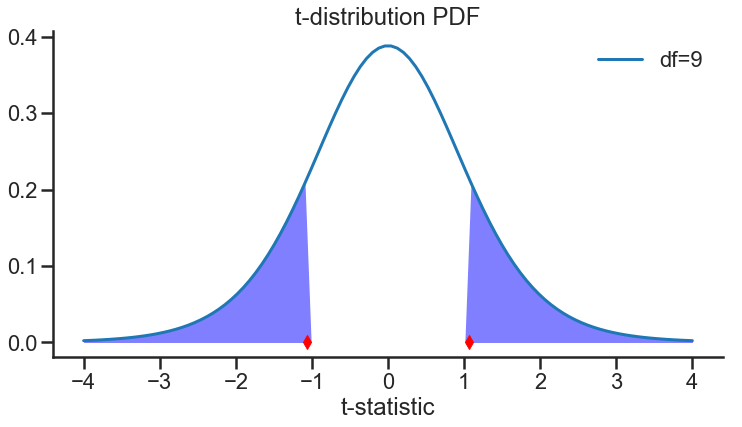

In [63]:
sns.set_context('poster')
sns.set_style('ticks')
fig,ax=plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(12)

#Generate the data
xv=np.linspace(-4,4,100)
yv=stats.t(len(tube)-1).pdf(xv)

#print necessary data
CheckVal=5.8
tVal=np.abs((CheckVal-np.mean(tube))/stats.sem(tube))
print('tVal for {0}: {1:5.3f}'.format(CheckVal, tVal))

(tstatistic, pVal) = stats.ttest_1samp(tube, CheckVal)
print('t-statistic={0:5.3f}, p={1:6.4f}'.format(float(tstatistic), pVal))

#empty the middle pdf
tFill = yv.copy()
tFill[(xv>-tstatistic) & (xv<tstatistic)] = 0

##plot 
ax.plot(xv, yv, label='df=9')
ax.fill_between(xv, tFill, color='blue', alpha=0.5, lw=0)
ax.plot(tVal, 0, 'rd', ms=10)
ax.plot(-tVal, 0, 'rd', ms=10)
ax.set_xlabel('t-statistic')
ax.set_title('t-distribution PDF')
ax.legend()

sns.despine()